{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x)}

Parameter Value        Standard Deviation
a0        5.000000e-01 2.075395e-02
a1        5.734887e-12 3.277426e-02
a2        6.124944e-12 3.197889e-02
a3        3.243879e-12 3.080979e-02
b1        6.267589e-01 2.548585e-02
b2        1.986491e-02 2.643438e-02
b3        1.846406e-01 2.756060e-02
w         8.671471e-01 3.356602e-02
Status message         Optimization terminated successfully.
Number of iterations   25
Objective              <symfit.core.objectives.LeastSquares object at 0x0000016F0FEDBAC0>
Minimizer              <symfit.core.minimizers.BFGS object at 0x0000016F0FEDBB50>

Goodness of fit qualifiers:
chi_squared            0.7478591086418305
objective_value        0.37392955432091524
r_squared              0.9401712713086535


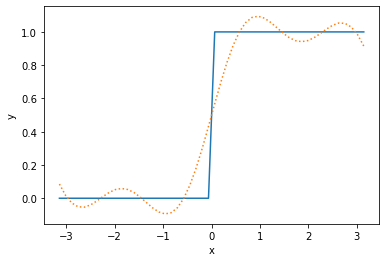

In [1]:
from symfit import parameters, variables, sin, cos, Fit
import numpy as np
import matplotlib.pyplot as plt

def fourier_series(x, f, n=0):
    # Make the parameter objects for all the terms
    a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                     for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    return series

x, y = variables('x, y')
w, = parameters('w')
model_dict = {y: fourier_series(x, f=w, n=3)}
print(model_dict)

# Make step function data
xdata = np.linspace(-np.pi, np.pi)
ydata = np.zeros_like(xdata)
ydata[xdata > 0] = 1
# Define a Fit object for this model and data
fit = Fit(model_dict, x=xdata, y=ydata)
fit_result = fit.execute()
print(fit_result)

# Plot the result
plt.plot(xdata, ydata)
plt.plot(xdata, fit.model(x=xdata, **fit_result.params).y, ls=':')
plt.xlabel('x')
plt.ylabel('y')
plt.show()